In [37]:
# Cargar conjunto de datos y visualizarlo
# Aplicar estandarización z-score y visualizar
# Normalizar Min-max [0, 1] y visualizar
# PCA de 0.95 al conjunto de datos original y visualizar
# PCA de 0.80 al conjunto de datos original y visualizar
# PCA de 0.95 al conjunto de datos estandarizado y visualizar
# PCA de 0.80 al conjunto de datos estandarizado y visualizar
# PCA de 0.95 al conjunto de datos normalizado y visualizar
# PCA de 0.80 al conjunto de datos normalizado y visualizar

# Práctica 2 — PCA
### Importación de las librerías

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

### Importación del dataset Iris

In [39]:
iris = datasets.load_iris()

X = iris.data   
y = iris.target
data_original = pd.DataFrame(X, columns=iris.feature_names) # Este es el conjunto de datos original


### Visualización del dataset

Mostramos el dataset con los valores de cada atributo.

In [40]:
data_original

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Mostramos las métricas de cada uno de los atributos del dataset, para comprender la escala y dispersión de cada atributo.

In [41]:
data_original.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


A continuación, mostramos una visualización gráfica de la distribución de los datos, según las dos primeras características, que son longitud y el ancho de sépalo. 

Text(0, 0.5, 'Sepal width')

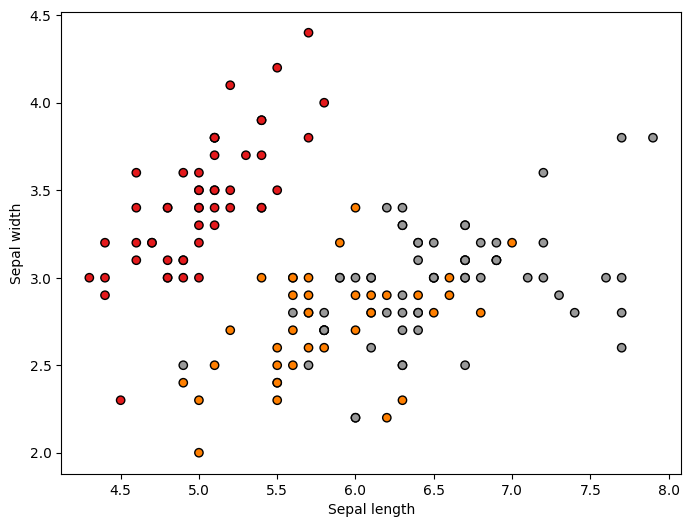

In [42]:
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(X[::, 0], X[::, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

### Estandarización

Vamos a estandarizar el conjunto de datos a escala unitaria, es decir: 
$
\\
\hspace{1cm}    media = 0
\hspace{1cm}    varianza = 1
$

Text(0, 0.5, 'Sepal width')

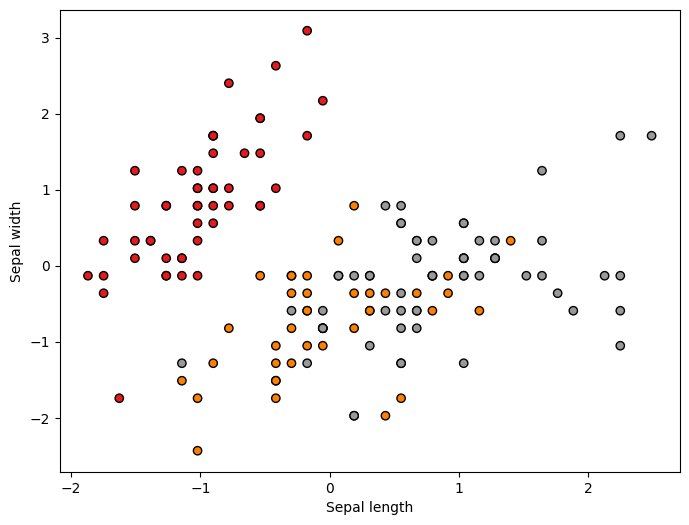

In [43]:

# Obtenemos el conjunto de datos estandarizado
data_standarized = StandardScaler().fit_transform(data_original)

# Mostrar la distribucion de los datos escalados utilizando la longitud y el ancho del sepalo
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(data_standarized[:, 0], data_standarized[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

Otra alternativa posible a la estandarización es normalizar los datos a un rango [0,1], para poder reducir su escala.

Text(0, 0.5, 'Sepal width')

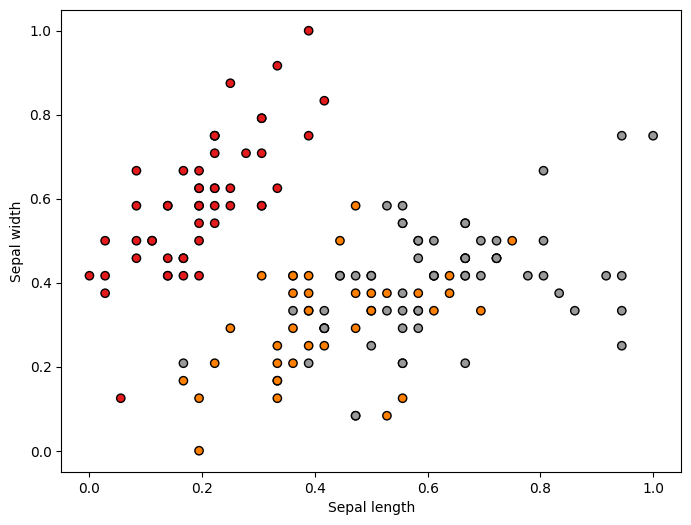

In [ ]:
# Obtenemos el conjunto de datos normalizado
data_normalized = MinMaxScaler().fit_transform(data_original)

# Mostrar la distribucion de los datos escalados utilizando la longitud y el ancho del sepalo
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(data_normalized[:, 0], data_normalized[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

### Calculo de Componentes Principales (PCA)

Vamos a aplicar la técnica de PCA a los conjuntos de los datos que hemos obtenido, para poder reducir su dimensionalidad, manteniendo la máxima información posible. Probaremos con dos marcas de

Comenzaremos con el conjunto de datos original

In [ ]:
# PCA 0.95

### Validación Cruzada

In [ ]:
from sklearn.model_selection import KFold

n_splits = 5
kf = KFold(n_splits=n_splits)

for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    print("Fold", fold)

    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]

    print(X_train.shape)
    print(y_train.shape)
    print(f"Test indices: {test_idx[0]}, {test_idx[-1]}\n")

    
    training = pd.DataFrame(
        np.concatenate((X_train, y_train.reshape(y_train.shape[0], 1)), axis=1),
        columns=[*iris.feature_names, "target"]
    )
    test = pd.DataFrame(
        np.concatenate((X_test, y_test.reshape(y_test.shape[0], 1)), axis=1),
        columns=[*iris.feature_names, "target"]
    )

    training.to_csv(f"csv/training{fold}.csv")
    test.to_csv(f"csv/test{fold}.csv")
    

Fold 0
(120, 4)
(120,)
Test indices: 0, 29

Fold 1
(120, 4)
(120,)
Test indices: 30, 59

Fold 2
(120, 4)
(120,)
Test indices: 60, 89

Fold 3
(120, 4)
(120,)
Test indices: 90, 119

Fold 4
(120, 4)
(120,)
Test indices: 120, 149

